In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../course_notebooks/DATA/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

<AxesSubplot:xlabel='Signal', ylabel='Density'>

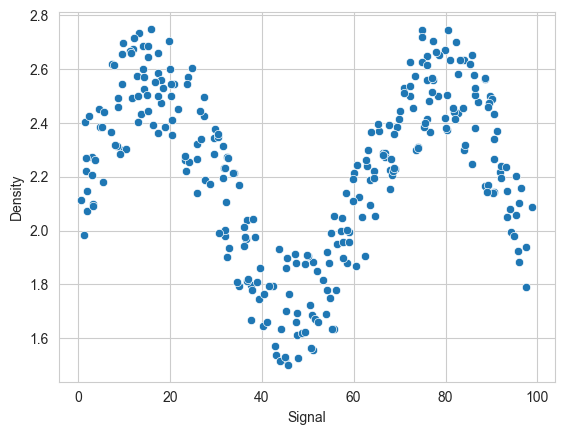

In [5]:
df.columns = ['Signal','Density']
sns.scatterplot(df,x='Signal',y='Density')

In [9]:
x = df['Signal'].values.reshape(-1,1)
y = df['Density']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_preds = linear_model.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mae: {}\nrmse: {}'.format(mean_absolute_error(y_test,linear_preds),np.sqrt(mean_squared_error(y_test,linear_preds))))

mae: 0.211198973318633
rmse: 0.2570051996584629


In [14]:
linear_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

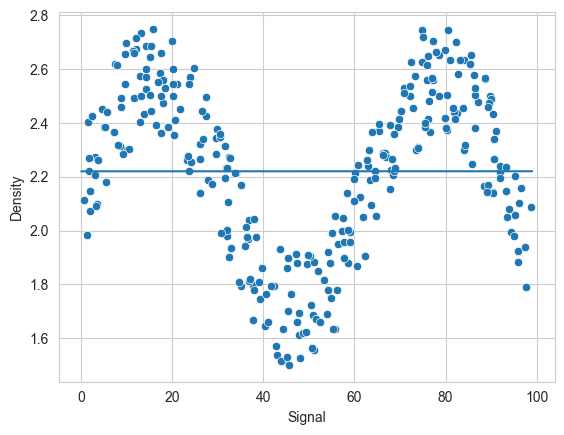

In [15]:
signal_range = np.arange(0,100)
signal_preds = linear_model.predict(signal_range.reshape(-1,1))
sns.scatterplot(df,x='Signal',y='Density')
plt.plot(signal_range,signal_preds)


In [43]:
def run_model(model,x_train,y_train,x_test,y_test):
    # fit model training
    model.fit(x_train,y_train)
    # get metrics
    preds = model.predict(x_test)
    mae = mean_absolute_error(y_test,preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'mae: {mae}\nrmse: {rmse}')
    # plot results model signal range
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(14,4))
    sns.scatterplot(df,x='Signal',y='Density',color='black')
    plt.plot(signal_range,output)

mae: 0.119691680455317
rmse: 0.1380752007754417


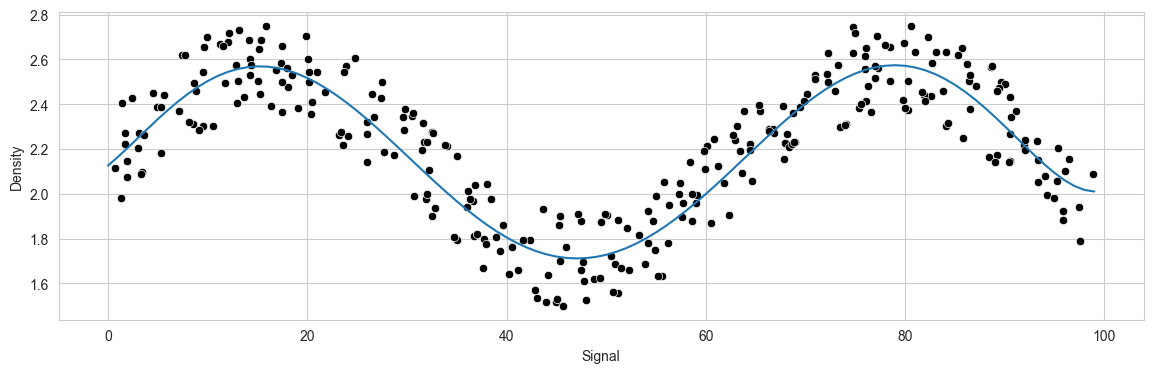

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
run_model(pipe,x_train,y_train,x_test,y_test)

mae: 0.11877297474442378
rmse: 0.1523487028635337


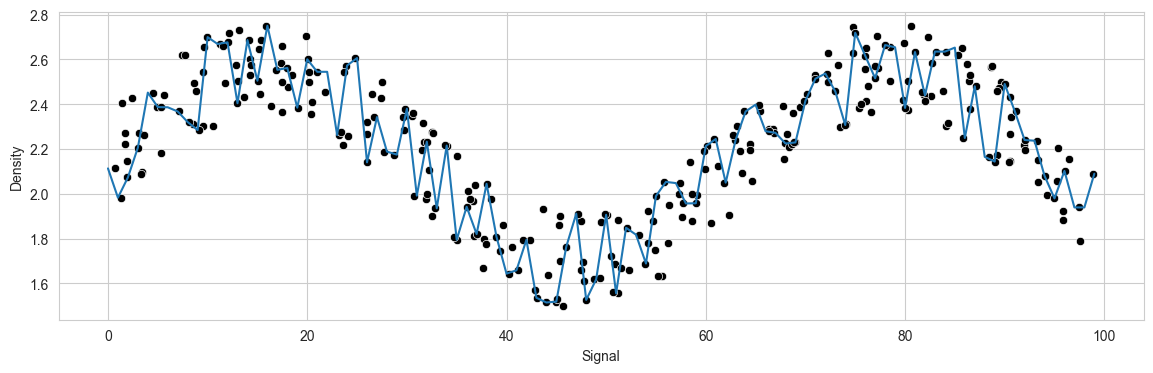

In [45]:
from sklearn.neighbors import KNeighborsRegressor
run_model(KNeighborsRegressor(n_neighbors=1),x_train,y_train,x_test,y_test)

mae: 0.12198383614100558
rmse: 0.13730685016923647


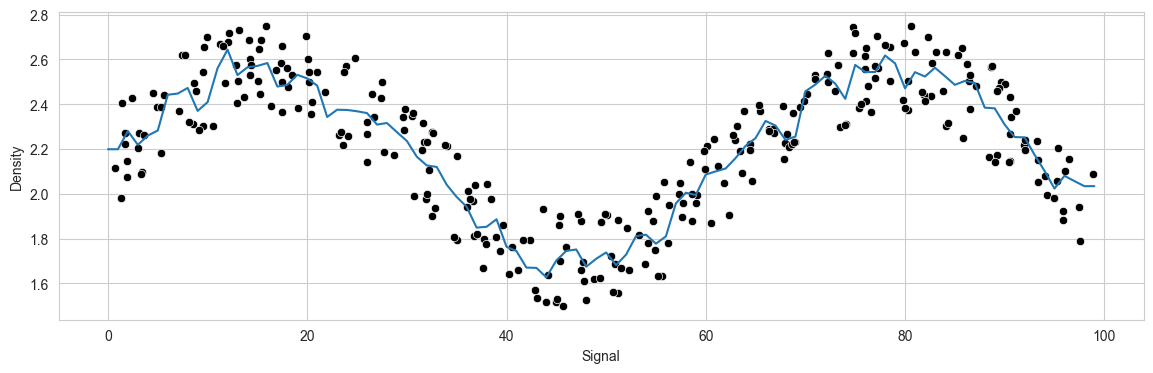

In [47]:
run_model(KNeighborsRegressor(n_neighbors=5),x_train,y_train,x_test,y_test)

mae: 0.11561598074223124
rmse: 0.13351482702752904


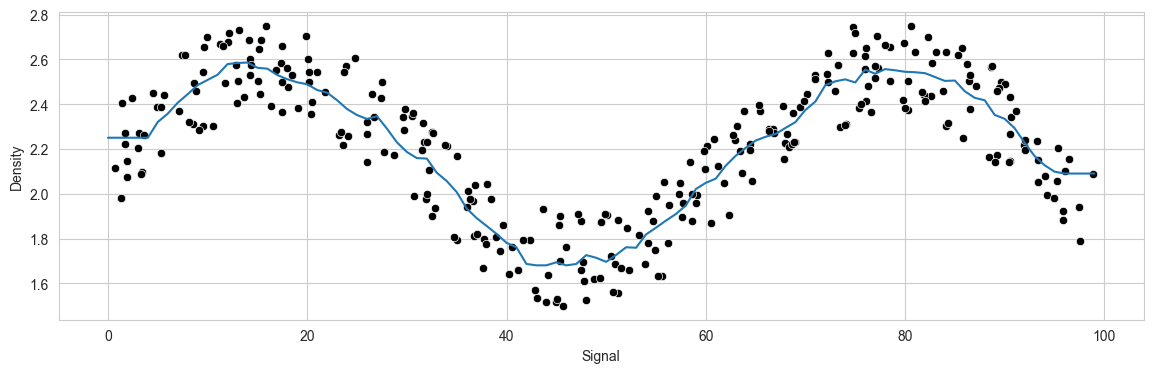

In [48]:
run_model(KNeighborsRegressor(n_neighbors=15),x_train,y_train,x_test,y_test)

mae: 0.11877297474442378
rmse: 0.1523487028635337


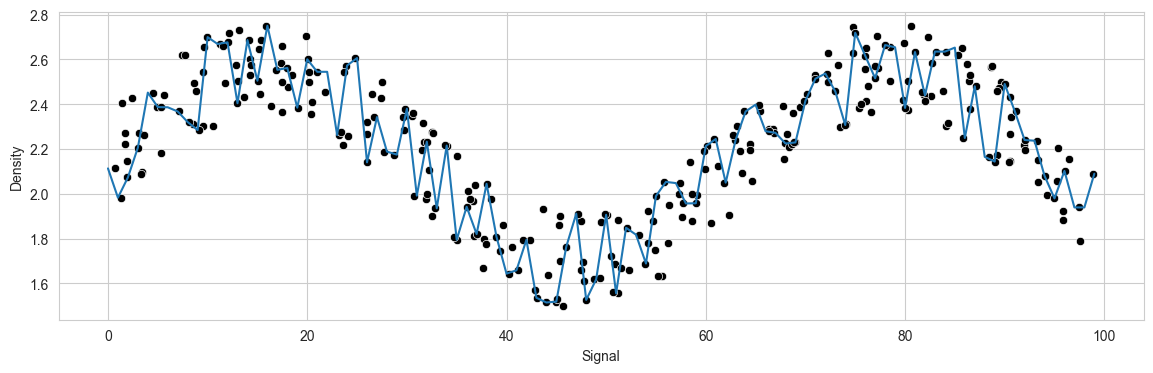

In [49]:
from sklearn.tree import DecisionTreeRegressor
run_model(DecisionTreeRegressor(),x_train,y_train,x_test,y_test)

mae: 0.10854210121348368
rmse: 0.12646999302046696


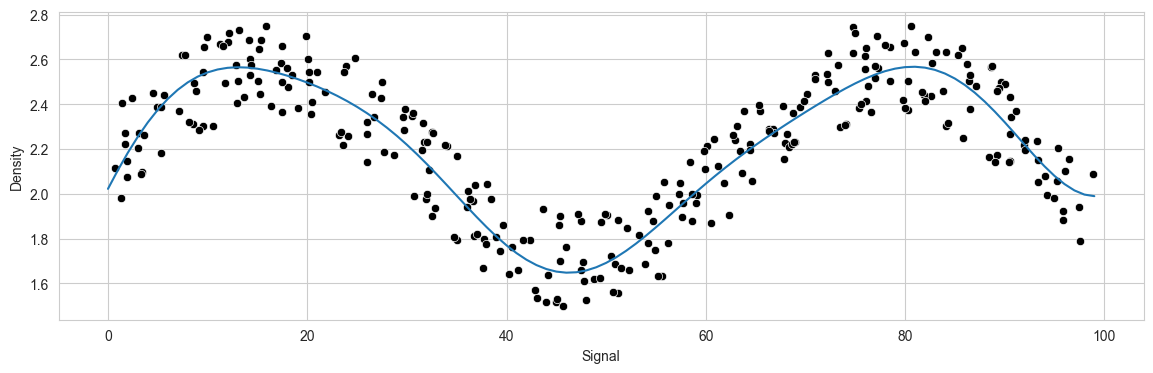

In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,1000],'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)
run_model(grid,x_train,y_train,x_test,y_test)

In [51]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

mae: 0.11490262638327763
rmse: 0.14526374891334545


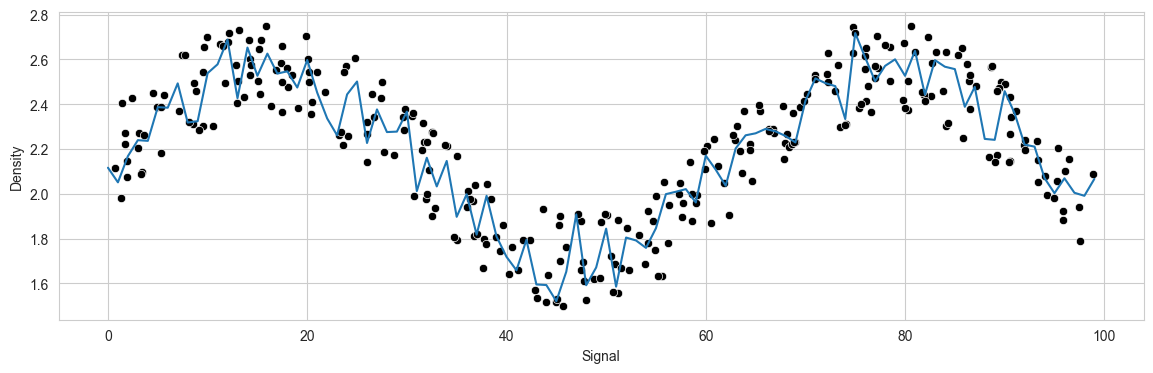

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr,x_train,y_train,x_test,y_test)